<h1 style="text-align: center;">Data Mining Project 1: Frequent Pattern & Association Rule</h1>

<p style="text-align:center;">
    呂伯駿<br>
    Q56074085<br>
    NetDB<br>
    National Cheng Kung University<br>
    pclu@netdb.csie.ncku.edu.tw
</p>


## Abstract

Frequent Pattern & Association Rule 是 Data mining 中的重要議題。 本次報告實作 Apriori & FP Growth 兩種經典算法，並使用IBM 合成資料集與 Kaggle Random Shop cart 資料集來比較兩者的效率。

## 1. Introduction

---

## 2. Environment

這個部分我將會說明實驗所使用的環境與使用資料集。

### 2.1 System Preferences

實驗環境如下：
- <b>Operating System</b>: macOS High Sierra (10.13.6)
- <b>CPU</b>: 1.3 GHz Intel Core i5
- <b>Memory</b>: 8 GB 1600 MHz DDR3
- <b>Programming Language</b> : Python 3.6.2

由於所用資料集大小皆不超過 4MB，實驗環境記憶體足以符合實驗需求。

### 2.2 Dataset

實驗使用以下資料集，來自 IBM Quest Synthetic Data Generator 以及 Kaggle。

#### a. IBM

本次實驗使用 IBM Quest Synthetic Data Generator Lit 模式合成了四組資料，參數設置如下表

| ntrans   |     tlength     |  nitems |
|----------|:-------------:|------:|
| 1 |  5 | 5 |
| 10 |    5   |  5 |
| 10 | 5 |    30 |
| 20 | 5 |    30 |

- <b>ntrans</b>: number of transactions in _000
- <b>tlength</b>: avg_items per transaction
- <b>nitems</b>: number of different items in _000

#### b. Kaggle: Random Shopping cart

[Random Shopping cart](https://www.kaggle.com/fanatiks/shopping-cart/home) 包含隨機排序之購物車資料，適合本次尋找 Frequent Pattern  的實驗情境。 <br>
此資料集有 1499筆資料，總共有 38 種商品，由於每筆資料中物品有可能重複出現，後續仍須再次處理去除同一筆資料中之相同商品。



資料範例如下：

1. yogurt, pork, sandwich bags, lunch meat, all- purpose, flour, soda, butter, vegetables, beef, aluminum foil, all- purpose, dinner rolls, shampoo, all- purpose, mixes, soap, laundry detergent, ice cream, dinner rolls, 
2. toilet paper, shampoo, hand soap, waffles, vegetables, cheeses, mixes, milk, sandwich bags, laundry detergent, dishwashing liquid/detergent, waffles, individual meals, hand soap, vegetables, individual meals, yogurt, cereals, shampoo, vegetables, aluminum foil, tortillas, mixes, 
3. ...


---

## 3. Implementation

### 3.1 pre-processing

#### a. IBM

IBM 所產生之資料格式為 id number(每一列)，為方便運算我將相同id之資料轉換至同一行，中間以','分隔。 如 (1: 255,266,267...)


#### b. Kaggle

由於 Random Shopping cart 中的每一筆資料包含商品可能重複，因此再跑演算法之前需要將其過濾。<br>
已過濾之資料路徑為： /data/Kaggle/cart_dataset_v2.txt <br>
原始資料路徑則為： /data/Kaggle/cart_dataset_v1.txt


### 3.2 Apriori

<b>概念:</b><br>

<b>優點:</b><br>


<b>缺點:</b>
需要多次 Scan 資料集來產生 Candidates


### 3.3 FP-growth

<b>概念:</b><br>


<b>優點:</b><br>


<b>缺點:</b>



---

## 4. Analysis

實驗使用2.2 敘述之資料集，比較兩種演算法在改變 minsup 數值以及資料量的情況下其時間的變化。 <br>
其中 FP-Growth 之結果為十次運算之時間平均，Aprior 由於時間上之考量為兩次運算之時間平均。

### a. IBM

In [67]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

ibm = pd.read_csv('./results/ibm.csv')
kaggle = pd.read_csv('./results/kaggle.csv')

ibm.head()

,data,minsup,fp_num,algorithm,time
0,t1_l5_n5,0.005,366,fpg,0.375859
1,t1_l5_n5,0.006,196,fpg,0.092633
2,t1_l5_n5,0.007,196,fpg,0.099796
3,t1_l5_n5,0.008,101,fpg,0.024959
4,t1_l5_n5,0.009,49,fpg,0.008303


上圖欄位分別為：<br>
<b>data</b>: data parameter <br>
<b>minsup</b>: minimum support <br>
<b>fp_num</b>: number of frequent pattern <br>
<b>alforithm</b>: choosen algorithm <br>
<b>time</b>: running time <br>

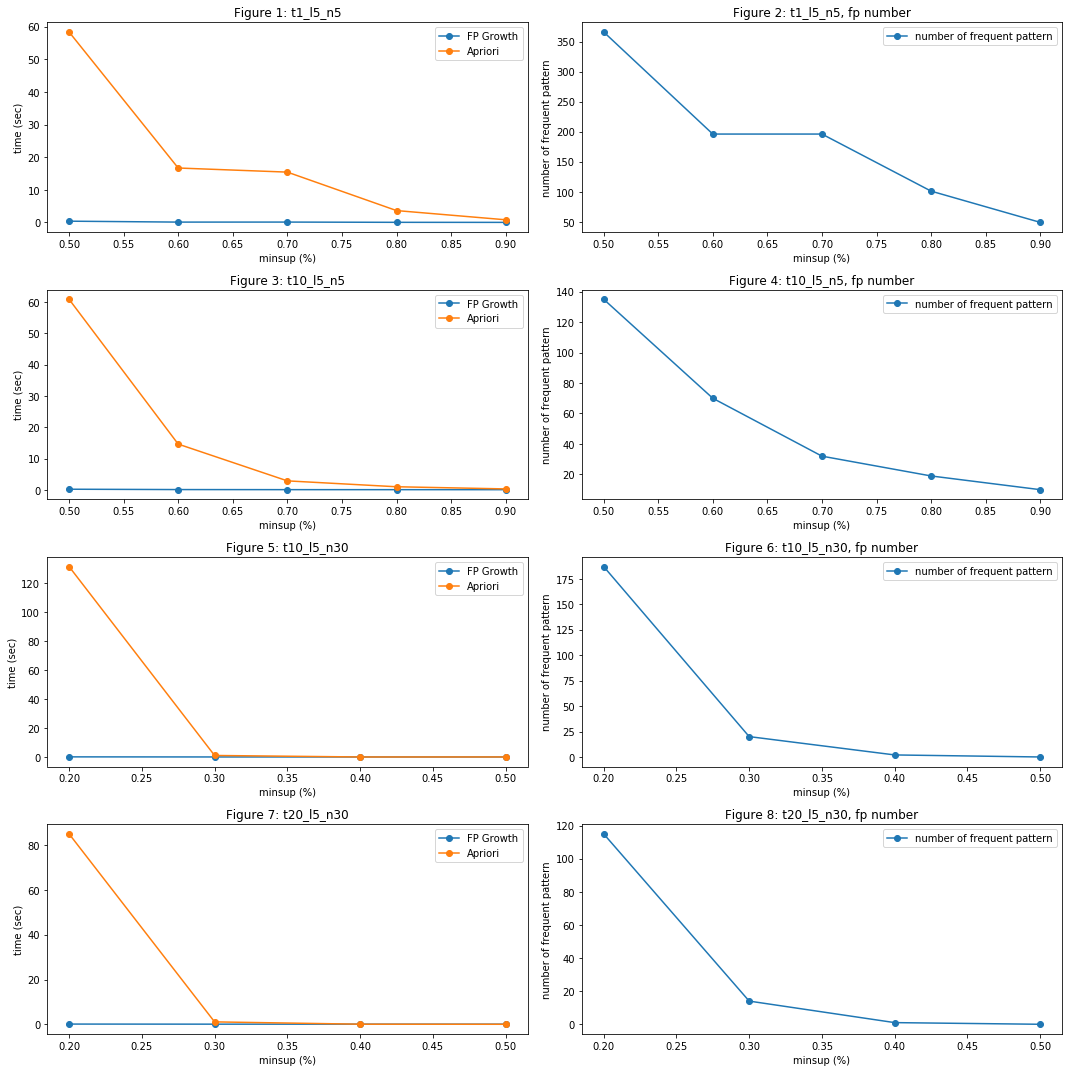

In [68]:

# t1_l5_n5
plt.figure(figsize=(15, 15))
plt.subplot(421)
x = [0.5, 0.6, 0.7, 0.8, 0.9]
y_1 = ibm['time'][0:5]
y_2 = ibm['time'][18:23]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 1: t1_l5_n5');

plt.subplot(422)
x = [0.5, 0.6, 0.7, 0.8, 0.9]
y_1 = ibm['fp_num'][0:5]
plt.plot(x, y_1, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('number of frequent pattern')
plt.legend(["number of frequent pattern"], loc=1);
plt.title('Figure 2: t1_l5_n5, fp number');



# t10_l5_n5
plt.subplot(423)
x = [0.5, 0.6, 0.7, 0.8, 0.9]
y_1 = ibm['time'][5:10]
y_2 = ibm['time'][23:28]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 3: t10_l5_n5');


plt.subplot(424)
x = [0.5, 0.6, 0.7, 0.8, 0.9]
y_1 = ibm['fp_num'][5:10]
plt.plot(x, y_1, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('number of frequent pattern')
plt.legend(["number of frequent pattern"], loc=1);
plt.title('Figure 4: t10_l5_n5, fp number');



# t10_l5_n30
plt.subplot(425)
x = [0.2, 0.3, 0.4, 0.5]
y_1 = ibm['time'][10:14]
y_2 = ibm['time'][28:32]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 5: t10_l5_n30');


plt.subplot(426)
x = [0.2, 0.3, 0.4, 0.5]
y_1 = ibm['fp_num'][10:14]
plt.plot(x, y_1, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('number of frequent pattern')
plt.legend(["number of frequent pattern"], loc=1);
plt.title('Figure 6: t10_l5_n30, fp number');



# t20_l5_n30
plt.subplot(427)
x = [0.2, 0.3, 0.4, 0.5]
y_1 = ibm['time'][14:18]
y_2 = ibm['time'][32:36]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 7: t20_l5_n30');



plt.subplot(428)
x = [0.2, 0.3, 0.4, 0.5]
y_1 = ibm['fp_num'][14:18]
plt.plot(x, y_1, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('number of frequent pattern')
plt.legend(["number of frequent pattern"], loc=1);
plt.title('Figure 8: t20_l5_n30, fp number');

plt.tight_layout()
plt.show()

在 IBM 合成資料集中，實驗使用四種不同 item 數，與資料量數之資料，結果顯示在 Figure 1 ~ Figure 4 中。
minsup由於不同資料集所含 frequent patterns 數目不同，因此有 0.5% ~ 0.9%, 0.2% ~ 0.5% 兩種設定。
在實驗中可以觀察到 FP growth 的效率遠遠超過 Apriori。 而當 minsup 值升高時兩者的時間差則開始縮小，其原因是因為 minsup 值升高則frequent pattern 的數目減少，而 Apriori 所需要 join 與搜索的 Candicates 數目也隨之減少的緣故。
<br>
<br>
<b>改變 Item 種類數目 </b><br>
而從 Figure 3 跟 Figure 5 可以看到item 種類增加(5000~30000)，Apriori 時間似乎會花較久，但事實上是因為後者生成之的FP數目較多，Candidate 數目也較多所導致。
<br>
<b>改變 Datasize </b><br>
Figure 5 與 Figure 7 則是改變 Transaction 數目，從約10000筆資料到 20000筆資料。  雖然 Apriori 需要不斷 Scan 整份資料集，但可以看到在目前的資料量下，Apriori 依然是FP 數目影響較大，FP 越多，花的時間越多， 但 FP growth 就不同了，雖然圖片看來差異不大，但在20000筆資料所花的時間是略為大於10000筆資料的。




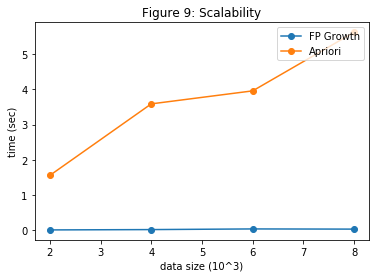

In [71]:

x = [2, 4, 6, 8]
y_1 = [0.014822602272033691,0.024219989776611328,0.04265165328979492,0.037372589111328125]
y_2 = [1.559230923652649,3.5876978635787964,3.9564480781555176,5.6181875467300415]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('data size (10^3)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 9: Scalability (minsup = 0.8%');


進一步改變 Data size 的結果可參考 Figure 9。 此實驗固定minsup 為0.8%，可觀察到兩者時間皆會隨者資料量增加而提升，但可看到 FP-growth 的時間改變量並不大，具有拓展性。

### b. Kaggle



In [39]:
kaggle.head()

,data,minsup,fp_num,algorithm,time
0,cart_dataset_v2,0.05,74,fpg,1.402993
1,cart_dataset_v2,0.06,89,fpg,1.395103
2,cart_dataset_v2,0.07,104,fpg,1.427723
3,cart_dataset_v2,0.08,119,fpg,1.365158
4,cart_dataset_v2,0.09,134,fpg,1.427504


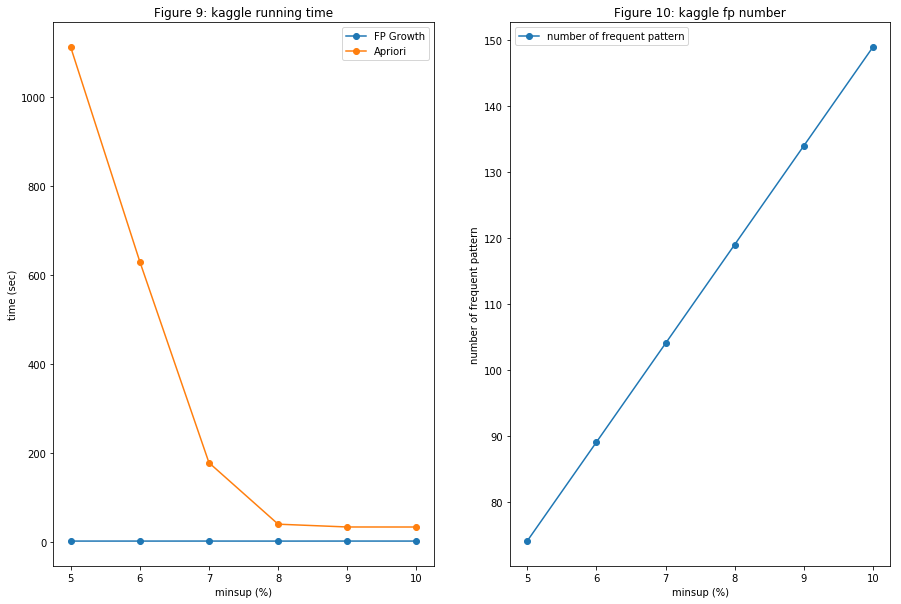

In [69]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
x = [5, 6, 7, 8, 9, 10]
y_1 = kaggle['time'][0:6]
y_2 = kaggle['time'][6:12]
plt.plot(x, y_1, 'o-')
plt.plot(x, y_2, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('time (sec)')
plt.legend(["FP Growth", "Apriori"], loc=1);
plt.title('Figure 9: kaggle running time');


plt.subplot(122)
x = [5, 6, 7, 8, 9, 10]
y_1 = kaggle['fp_num'][0:6]
plt.plot(x, y_1, 'o-')
plt.xlabel('minsup (%)')
plt.ylabel('number of frequent pattern')
plt.legend(["number of frequent pattern"], loc=2);
plt.title('Figure 10: kaggle fp number');

plt.show()

觀察 Figure 9 與 Figure 10，在 Kaggle 資料集 Apriori 依舊比 FP-growth 慢許多，雖然資料僅有 1499 筆，但平均每個 Transaction 有 15 項 Item，算法需要花費極大的Join 與 prune 時間，為此即便FP 數目少 Apriori 所花費時間仍為IBM 1000 筆資料時的 20倍。

### c. Association rules
由於IBM資料集是合成資料，探討其 Association Rules 意義較低，因此以下僅提供 Random Shopping Cart 出現頻率前五高的 Rules。

In [72]:
rules = pd.read_csv('rules.csv')
rules.head(10)

,rule,confidence,support
0,eggs->vegetables,0.851536,499
1,yogurt->vegetables,0.845217,486
2,laundry detergent->vegetables,0.840909,481
3,aluminum foil->vegetables,0.826307,490
4,spaghetti sauce->vegetables,0.825312,463
5,sugar->vegetables,0.824468,465
6,ice cream->vegetables,0.824027,487
7,dishwashing liquid/detergent->vegetables,0.821070,491
8,waffles->vegetables,0.819699,491
9,sandwich bags->vegetables,0.818841,452


## 5. Conclusion

FP-Growth 算法比起 Apriori 有顯著的效率差異，原因是它透過建立 FP-Tree 來減少探索時間，相對的 Apriori 則需要不斷 Scan 資料集來確認是否滿足 minisup 條件。  雖然這種FP-Tree的結構在資料量大時仍具有優勢，但當 frequent patterns 的數目減少時(minsup增加)，兩者的時間差異會越來越少，這時建立 FP-Tree 這種資料結構的時間花費便體現出來。
